In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


below code from applied machine learning course on linkedin

In [2]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [3]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

red_wines = pd.read_csv("winequality-red.csv", sep=";")
red_wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
# Create Target Column based on quality rating of 5 or lower = bad (0) and 6 or higher = good (1)
red_wines['target'] = np.where(red_wines['quality']<=5,0,1)

In [5]:
X = red_wines.drop(["quality", 'target'], axis=1)
y= red_wines.target

In [6]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [8]:
# scale data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [9]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,2), (50,2), (100,2)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train_scaled, y_train)

print_results(cv)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'constant'}

0.746 (+/-0.064) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'constant'}
0.75 (+/-0.062) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'invscaling'}
0.715 (+/-0.189) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'adaptive'}
0.76 (+/-0.076) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}
0.752 (+/-0.074) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'invscaling'}
0.699 (+/-0.176) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'adaptive'}
0.772 (+/-0.065) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'constant'}
0.762 (+/-0.05) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'invscaling'}
0.687 (+/-0.217) for {'activation': 'relu', 'hidden_layer_sizes':

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
cv.best_estimator_

MLPClassifier(hidden_layer_sizes=(100, 2))

In [47]:
predictions = cv.predict(X_test_scaled)
print(classification_report(y_test, predictions))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 23)

In [11]:
predictions = cv.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       178
           1       0.80      0.76      0.78       222

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



In [27]:
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

In [29]:
# https://www.scikit-yb.org/en/latest/api/features/rankd.html
X,y = red_wines.drop(['target', 'quality'], axis =1), red_wines.target

In [36]:
visualizer = Rank1D(algorithm='shapiro')

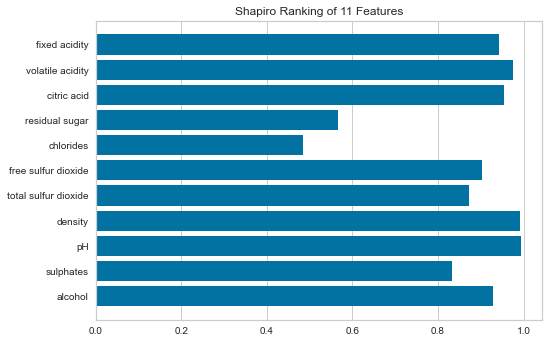

<AxesSubplot:title={'center':'Shapiro Ranking of 11 Features'}>

In [37]:
visualizer.fit(X,y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [39]:
visualizer2 = Rank2D(algorithm='pearson')

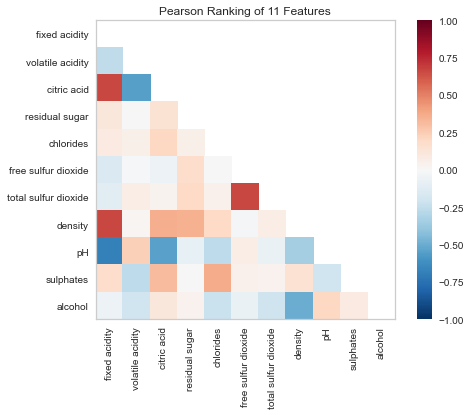

<AxesSubplot:title={'center':'Pearson Ranking of 11 Features'}>

In [40]:
visualizer2.fit(X,y)           # Fit the data to the visualizer
visualizer2.transform(X)        # Transform the data
visualizer2.show()              # Finalize and render the figure

## Testing with best param and best features

In [42]:
# using 5 parameters we have determined may result with better results:
X2 = red_wines.drop(["quality",'residual sugar', 'chlorides'], axis=1)
y2 = red_wines.target

In [43]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, random_state=42)

In [44]:
X_scaler2 = StandardScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [46]:
mlp2 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (100, 2), learning_rate='constant')
parameters = {
    'hidden_layer_sizes': [(10,2), (50,2), (100,2)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv2 = GridSearchCV(mlp, parameters, cv=5)
cv2.fit(X_train_scaled2, y_train2)

print_results(cv2)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'invscaling'}

0.999 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'constant'}
1.0 (+/-0.0) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'invscaling'}
0.999 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'adaptive'}
0.999 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}
0.998 (+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'invscaling'}
0.997 (+/-0.013) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'adaptive'}
0.904 (+/-0.379) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'constant'}
0.998 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'invscaling'}
0.888 (+/-0.418) for {'activation': 'relu', 'hidden_layer_sizes':

In [48]:
cv2.best_estimator_

MLPClassifier(hidden_layer_sizes=(10, 2), learning_rate='invscaling')

In [49]:
predictions2 = cv2.predict(X_test_scaled2)
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       222

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [50]:
predictions2 = cv2.predict(X_test_scaled2)
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       222

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

